In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sta
import math
import random
import statsmodels.stats.weightstats as sw
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 202面

In [3]:
data1 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验8\第10章  时间序列分析与预测.xlsx",sheet_name='表10-8',index_col=0)
data1

,我国汽车产量（万辆）
2012,1927.62
2013,2212.09
2014,2372.52
2015,2450.00
2016,2812.00
2017,2902.00


## 时间序列折线图

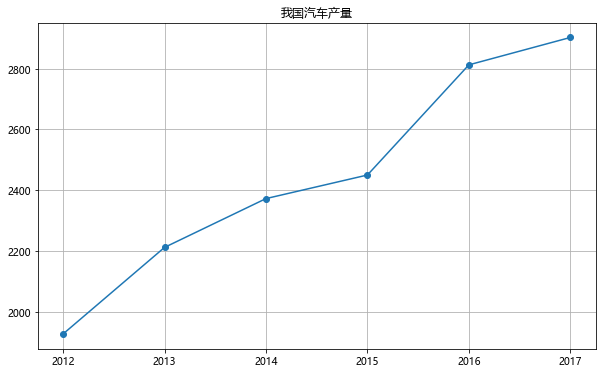

In [4]:
plt.figure(figsize=(10,6))
plt.plot(data1,'-o')
plt.grid()
plt.title('我国汽车产量')
plt.show()

In [5]:
increase = [data1.iloc[_+1,0] - data1.iloc[_,0] for _ in range(len(data1) - 1)]
increase.insert(0,0)
in_all = increase.copy()
for _ in range(len(in_all)-1):
    in_all[_+1] = in_all[_] + in_all[_+1]
data1['增长量'] = increase
data1['累计增长量'] = in_all
data1

,我国汽车产量（万辆）,增长量,累计增长量
2012,1927.62,0.00,0.00
2013,2212.09,284.47,284.47
2014,2372.52,160.43,444.90
2015,2450.00,77.48,522.38
2016,2812.00,362.00,884.38
2017,2902.00,90.00,974.38


## 发展速度

In [6]:
increase_speed = [0]
for _ in range(len(data1) - 1):
    increase_speed.append(data1.iloc[_ + 1,0] / data1.iloc[_,0] * 100)
data1['环比发展速度'] = increase_speed
increase_speed2 = [0]
for _ in range(len(data1) - 1):
    increase_speed2.append(data1.iloc[_+1,0] / data1.iloc[0,0] * 100)
data1['定基发展速度'] = increase_speed2
data1

,我国汽车产量（万辆）,增长量,累计增长量,环比发展速度,定基发展速度
2012,1927.62,0.00,0.00,0.000000,0.000000
2013,2212.09,284.47,284.47,114.757577,114.757577
2014,2372.52,160.43,444.90,107.252417,123.080275
2015,2450.00,77.48,522.38,103.265726,127.099740
2016,2812.00,362.00,884.38,114.775510,145.879375
2017,2902.00,90.00,974.38,103.200569,150.548345


# 211面

In [7]:
data2 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验8\第10章  时间序列分析与预测.xlsx",sheet_name='表10-11')
data2.columns = ['月份','营业额（万元）']
data2

,月份,营业额（万元）
0,1,24
1,2,28
2,3,26
3,4,32
4,5,23
5,6,30
6,7,31
7,8,23
8,9,25
9,10,29


## 时间序列折线图

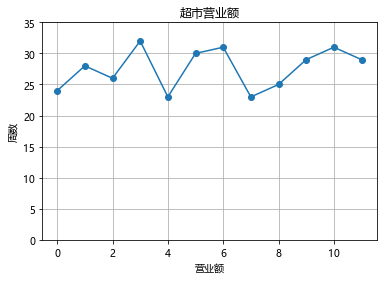

In [8]:
plt.plot(data2['营业额（万元）'],'-o')
plt.grid()
plt.ylim(0,35)
plt.xlabel('营业额')
plt.ylabel('周数')
plt.title('超市营业额')
plt.show()

## 移动平均预测法(a=0.1)

In [9]:
move_avg = []
for _ in range(1,len(data2) - 1):
    move_avg.append(round((data2.iloc[_-1,1] + data2.iloc[_,1] + data2.iloc[_+1,1]) / 3,2))
move_avg = np.array(move_avg)
for _ in range(3):
    move_avg = np.insert(move_avg,0,np.nan)
data = data2.append([{'营业额（万元）':np.nan,'月份':13}],ignore_index=True)
data['3项移动平均预测值'] = move_avg
a = 0.1
exp_smooth = [data.iloc[0,1]]
for _ in range(1,len(data) - 1):
    exp_smooth.append(a * data.iloc[_,1] + (1 - a) * exp_smooth[-1])
exp_smooth = np.insert(exp_smooth,0,np.nan)
data['指数平滑预测值（a=0.1）'] = exp_smooth
data

,月份,营业额（万元）,3项移动平均预测值,指数平滑预测值（a=0.1）
0,1,24.0,NaN,NaN
1,2,28.0,NaN,24.000000
2,3,26.0,NaN,24.400000
3,4,32.0,26.00,24.560000
4,5,23.0,28.67,25.304000
5,6,30.0,27.00,25.073600
6,7,31.0,28.33,25.566240
7,8,23.0,28.00,26.109616
8,9,25.0,28.00,25.798654
9,10,29.0,26.33,25.718789


## 数据可视化

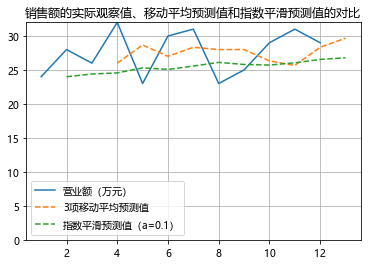

In [10]:
plt.plot(data['月份'],data['营业额（万元）'],'-',label='营业额（万元）')
plt.plot(data['月份'],data['3项移动平均预测值'],'--',label='3项移动平均预测值')
plt.plot(data['月份'],data['指数平滑预测值（a=0.1）'],'--',label='指数平滑预测值（a=0.1）')
plt.ylim(0,32)
plt.grid()
plt.title('销售额的实际观察值、移动平均预测值和指数平滑预测值的对比')
plt.legend()
plt.show()

In [11]:
data2 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验8\第10章  时间序列分析与预测.xlsx",sheet_name=1)
data2.columns = ['年份','t','销售额实际观察值（万元）']
x = sm.add_constant(data2['t'])
y = data2.iloc[:,2]
model = sm.OLS(y,x)
results = model.fit()
results.summary()

C:\Users\柠檬\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           销售额实际观察值（万元）   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     245.9
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           2.28e-08
Time:                        18:37:14   Log-Likelihood:                -53.283
No. Observations:                  12   AIC:                             110.6
Df Residuals:                      10   BIC:                             111.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.2424     13.834     32.113      0.000     413.419     475.066
t             29.4755      1.880     15.681      0.000      25.287      33.664
==============================================================================
Omnibus:                        6.717   Durbin-Watson:                   2.688
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                1.490
Skew:                           0.178   Prob(JB):                        0.475
Kurtosis:                       1.311   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 建立线性回归方程

In [12]:
a = results.params[0]
b = results.params[1]
print("线性趋势方程为：y = {:.2f} + {:.2f}t".format(a,b))

线性趋势方程为：y = 444.24 + 29.48t


## 计算2018年销售额的预测值

In [13]:
t = 13
y_ = a + b * t
print("预测值为：%f"%y_)

预测值为：827.424242


# 218面

In [14]:
data3 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验8\第10章  时间序列分析与预测.xlsx",sheet_name=0)
data3 = data3.append([{'季度':np.nan,2015:np.nan,2016:np.nan,2017:np.nan}],ignore_index=True)
m = [ round(sum([data3.iloc[i,j] for j in range(1,4)]) / 3,2) for i in range(4)]
m.append(sum(m) / len(m))
data3['同季平均数'] = m
data3

,季度,2015,2016,2017,同季平均数
0,一,24.0,26.0,25.0,25.00
1,二,12.0,13.0,15.0,13.33
2,三,8.0,10.0,9.0,9.00
3,四,30.0,32.0,33.0,31.67
4,NaN,NaN,NaN,NaN,19.75


## 季节指数与预测

In [15]:
e = [round(data3.iloc[_,4] / data3.iloc[4,4] * 100,2) for _ in range(4)]
e = np.array(e)
e = np.append(e,np.nan)
data3['季节指数%'] = e
y = [round(data3.iloc[_,5] * 22.5 / 100,2) for _ in range(5)]
data3['预测'] = y
data3

,季度,2015,2016,2017,同季平均数,季节指数%,预测
0,一,24.0,26.0,25.0,25.00,126.58,28.48
1,二,12.0,13.0,15.0,13.33,67.49,15.19
2,三,8.0,10.0,9.0,9.00,45.57,10.25
3,四,30.0,32.0,33.0,31.67,160.35,36.08
4,NaN,NaN,NaN,NaN,19.75,NaN,NaN


# Walmartdata.xls

In [16]:
data4 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验8\Walmartdata.xls",skiprows=9)
data4 = data4.drop(["Unnamed: {}".format(_) for _ in range(4)],axis=1)
data4

,Year,Quarter,season,Sales
0,1994,1,1,17686.000
1,1994,2,2,19942.315
2,1994,3,3,20417.717
3,1994,4,4,25365.968
4,1995,5,1,20440.000
...,...,...,...,...
61,2009,62,2,102342.000
62,2009,63,3,99473.000
63,2009,64,4,113651.000
64,2010,64,1,99848.000


## 移动平均比率法

In [17]:
pivot = pd.pivot_table(data4,index=['Year','season'],values=['Sales'],aggfunc='sum')
move = pivot.iloc[:,0]
move = list(move)
move_n4 = []
for _ in range(len(move) - 3):
    move_n4.append(sum(move[_:_+4])/4)
move_n4 = np.array(move_n4)
move_n4 = np.insert(move_n4,[0],np.nan)
move_n4 = np.append(move_n4,np.nan)
move_n4 = np.append(move_n4,np.nan)
pivot['移动平均n=4'] = move_n4
move = pivot.iloc[:,1]
move = list(move)
move_n2 = []
for _ in range(len(move) - 1):
    move_n2.append(sum(move[_:_+2])/2)
move_n2 = np.array(move_n2)
move_n2 = np.insert(move_n2,[0],np.nan)
pivot['移动平均n=2'] = move_n2
pivot['季节比率'] = pivot['移动平均n=2'] / pivot['Sales'] * 100
pivot

Sales       移动平均n=4        移动平均n=2        季节比率
Year season                                                     
1994 1        17686.000           NaN            NaN         NaN
     2        19942.315   20853.00000            NaN         NaN
     3        20417.717   21541.50000   21197.250000  103.817924
     4        25365.968   22236.67125   21889.085625   86.293122
1995 1        20440.000   22860.49200   22548.581625  110.315957
...                 ...           ...            ...         ...
2009 2       102342.000  102376.50000  101588.000000   99.263255
     3        99473.000  103828.50000  103102.500000  103.648729
     4       113651.000  104165.25000  103996.875000   91.505464
2010 1        99848.000           NaN            NaN         NaN
     2       103689.000           NaN            NaN         NaN

[66 rows x 4 columns]

## 季节指数

In [18]:
a = (pivot.groupby(by='season').sum() / (2010-1994))['季节比率']
s = 4 / sum(a/100)
b = a*s
df = pd.DataFrame(data={'季节指数%':b})
df

,季节指数%
season,
1,104.507482
2,98.147794
3,107.806826
4,89.537897


## 2010年预测值

In [19]:
x = data4.iloc[:-4,1]
x2 = sm.add_constant(x)
y = data4.iloc[:-4,-1]
model = sm.OLS(y,x2)
result = model.fit()
x_ = [63,64,65,66]
x2_ = sm.add_constant(x_)
y__ = result.predict(x2_)
print("2009年季度3: {:.2f}".format(y__[0] * df.iloc[2,0] / 100))
print("2009年季度4: {:.2f}".format(y__[1] * df.iloc[3,0] / 100))
print("2010年季度1: {:.2f}".format(y__[2] * df.iloc[0,0] / 100))
print("2010年季度2: {:.2f}".format(y__[3] * df.iloc[1,0] / 100))

2009年季度3: 110344.41
2009年季度4: 92936.59
2010年季度1: 109981.38
2010年季度2: 104703.87


## 创建一个预测的趋势估算

In [20]:
ex = data4.iloc[48:60,:]
pi = pd.pivot_table(ex,index='season',columns='Year',values='Sales',aggfunc='sum')
m = [ round(sum([pi.iloc[i,j] for j in range(3)]) / 3,2) for i in range(4)]
pi['同季平均数'] = m
avg = pi.iloc[:,3].sum() / 4
e = [round(pi.iloc[_,3] / avg  * 100,2) for _ in range(4)]
pi['季节指数%'] = e
pi

Year,2006,2007,2008,同季平均数,季节指数%
season,,,,,
1,79613.0,85387.0,86378.0,83792.67,91.26
2,84524.0,91990.0,92999.0,89837.67,97.85
3,83543.0,90880.0,91865.0,88762.67,96.68
4,100970.0,106269.0,107343.0,104860.67,114.21
